In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def fetch_market_data(symbol, start_date, end_date):
    """
    Fetch historical market data from Yahoo Finance.

    Parameters:
    - symbol: Stock symbol or ticker.
    - start_date: Start date for data collection (format: "YYYY-MM-DD").
    - end_date: End date for data collection (format: "YYYY-MM-DD").

    Returns:
    - DataFrame containing historical market data.
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [25]:

def perform_eda(data, title, covid_start_date, covid_end_date):
    """
    Perform exploratory data analysis (EDA) on market data.

    Parameters:
    - data: DataFrame containing historical market data.
    - title: Title for the plot.
    - covid_start_date: Start date of the COVID-19 pandemic.
    - covid_end_date: End date of the COVID-19 pandemic.

    Returns:
    - None (displays summary statistics and plots).
    """
    # Display summary statistics
    print("Summary Statistics for", title, ":")
    print(data.describe())

    # Plot closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title('Closing Price - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volume'], color='red')
    plt.title('Trading Volume - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()
    
        # Initial inferences
    pre_covid_data = data[data.index < covid_start_date]
    during_covid_data = data[(data.index >= covid_start_date) & (data.index <= covid_end_date)]
    post_covid_data = data[data.index > covid_end_date]

    print("Initial Inferences for", title, ":")
    print("- Before COVID-19 pandemic:")
    print(pre_covid_data.describe())
    print("- During COVID-19 pandemic:")
    print(during_covid_data.describe())
    print("- After COVID-19 pandemic:")
    print(post_covid_data.describe())
    print()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Summary Statistics for S&P 500 :
              Open         High          Low        Close    Adj Close  \
count  2768.000000  2768.000000  2768.000000  2768.000000  2768.000000   
mean   2076.272282  2086.857052  2064.740615  2076.692679  2076.692679   
std     674.223824   677.084240   670.953893   674.089735   674.089735   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1413.089966  1418.964996  1405.944977  1413.327515  1413.327515   
50%    2049.979980  2062.880005  2041.570007  2050.875000  2050.875000   
75%    2657.380066  2674.734985  2638.384949  2656.442566  2656.442566   
max    3750.010010  3756.120117  3730.209961  3735.360107  3735.360107   

             Volume  
count  2.768000e+03  
mean   3.830034e+09  
std    9.426344e+08  
min  

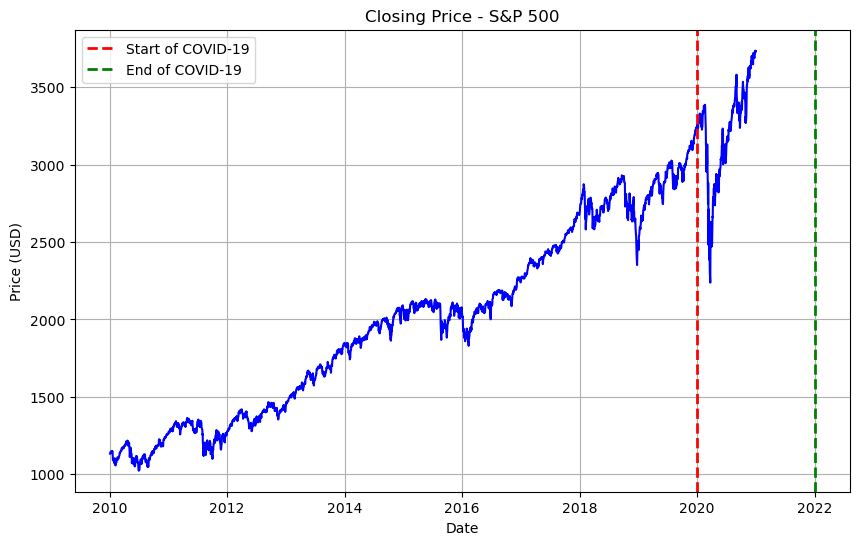

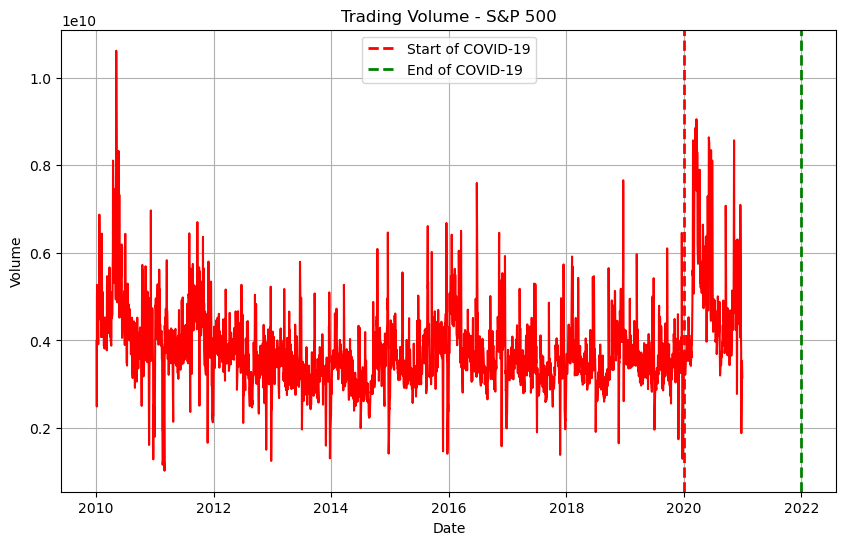

Initial Inferences for S&P 500 :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean   1962.147905  1971.346574  1952.200450  1962.608854  1962.608854   
std     589.031496   590.190988   587.623893   588.910251   588.910251   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1381.642548  1390.700012  1372.800018  1384.404999  1384.404999   
50%    1985.319946  1993.084961  1975.660034  1986.479980  1986.479980   
75%    2434.179932  2441.522522  2427.959961  2433.967529  2433.967529   
max    3247.229980  3247.929932  3234.370117  3240.020020  3240.020020   

             Volume  
count  2.516000e+03  
mean   3.719926e+09  
std    8.129706e+08  
min    1.025000e+09  
25%    3.244208e+09  
50%    3.595235e+09  
75%    4.078560e+09  
max    1.061781e+10  
- During COVID-19 pandemic:
              Open         High          Low  

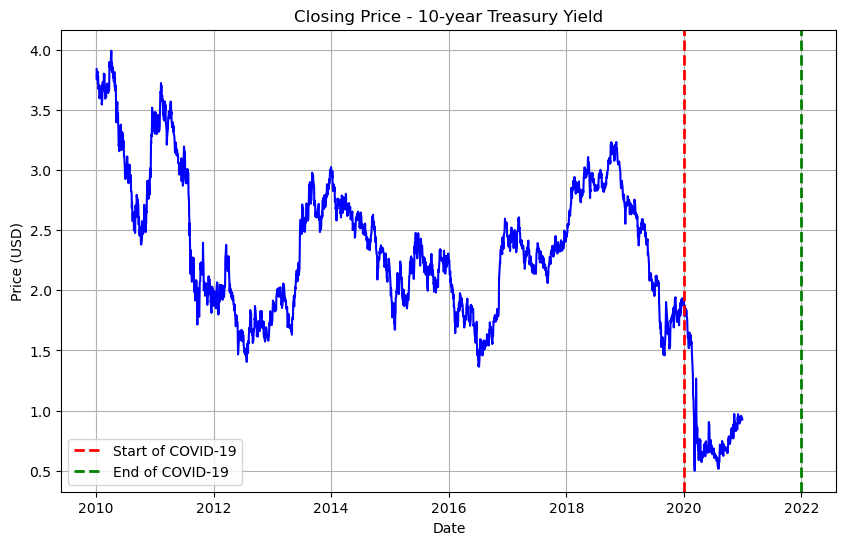

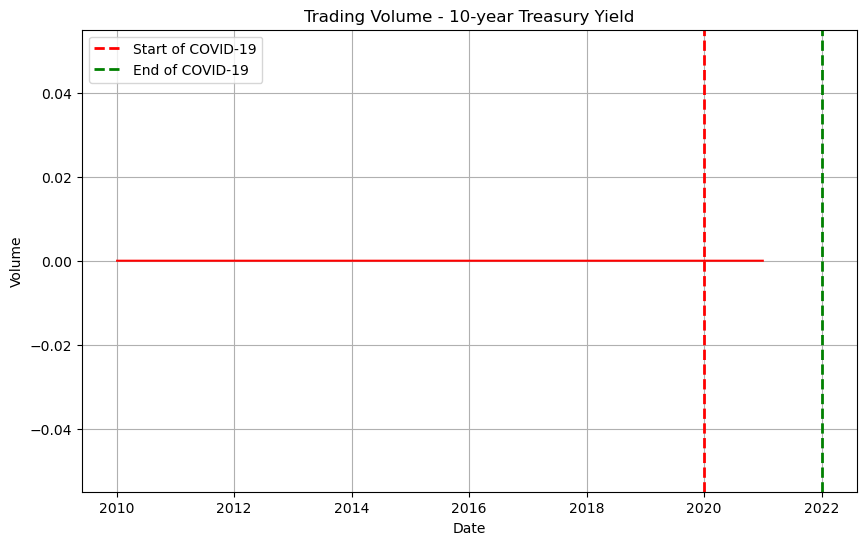

Initial Inferences for 10-year Treasury Yield :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  Volume
count  2513.000000  2513.000000  2513.000000  2513.000000  2513.000000  2513.0
mean      2.397284     2.423155     2.369762     2.395711     2.395711     0.0
std       0.554292     0.554791     0.552126     0.552868     0.552868     0.0
min       1.336000     1.395000     1.336000     1.366000     1.366000     0.0
25%       1.956000     1.984000     1.922000     1.955000     1.955000     0.0
50%       2.340000     2.366000     2.319000     2.343000     2.343000     0.0
75%       2.763000     2.782000     2.736000     2.755000     2.755000     0.0
max       3.964000     4.013000     3.947000     3.994000     3.994000     0.0
- During COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000   252.0
mean     0.880710    0.905282    0.85

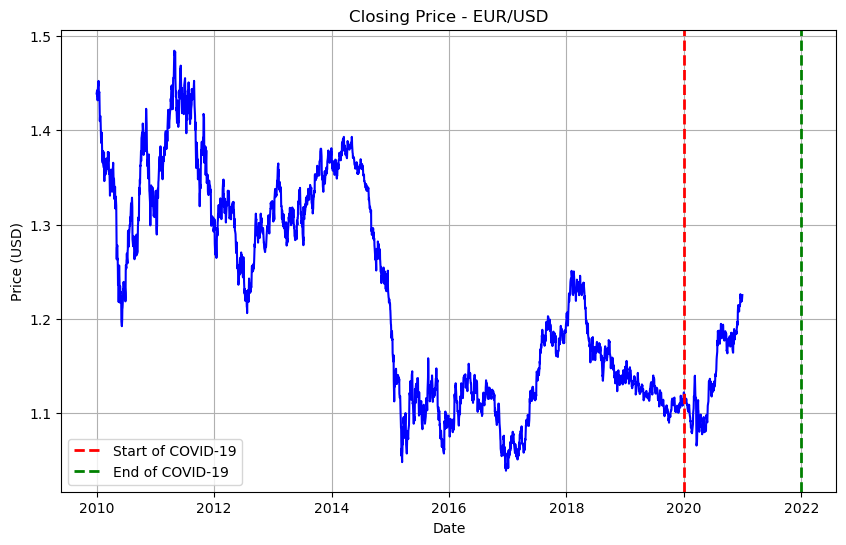

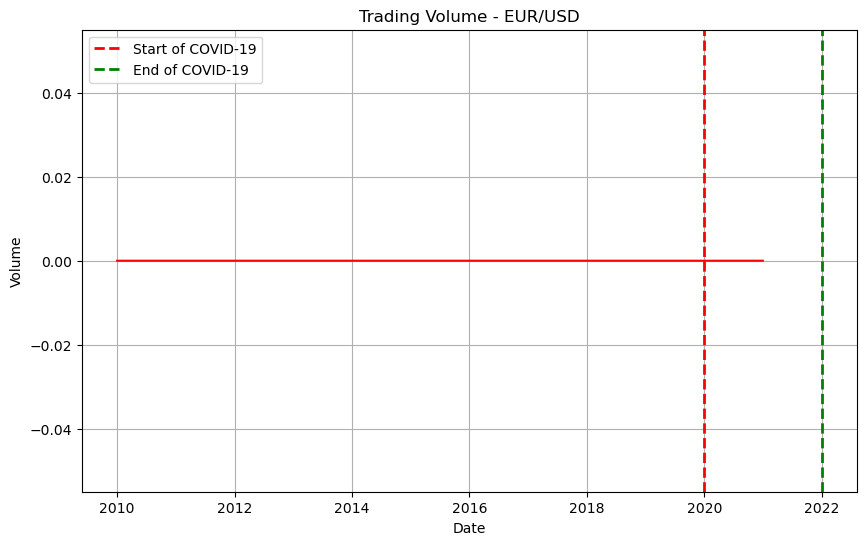

Initial Inferences for EUR/USD :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  Volume
count  2603.000000  2603.000000  2603.000000  2603.000000  2603.000000  2603.0
mean      1.231071     1.235449     1.226403     1.231027     1.231027     0.0
std       0.113341     0.113937     0.112937     0.113271     0.113271     0.0
min       1.039393     1.041992     0.760572     1.039047     1.039047     0.0
25%       1.123640     1.128000     1.120398     1.123671     1.123671     0.0
50%       1.229695     1.234568     1.225505     1.229559     1.229559     0.0
75%       1.332800     1.337278     1.327525     1.332889     1.332889     0.0
max       1.484296     1.493808     1.480494     1.484406     1.484406     0.0
- During COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  261.000000  261.000000  261.000000  261.000000  261.000000   261.0
mean     1.141452    1.145320    1.137795    1.14151

In [26]:
if __name__ == "__main__":
    # Define parameters
    symbols = ["^GSPC", "^TNX", "EURUSD=X"]  # Example symbols: S&P 500, 10-year Treasury yield, EUR/USD
    titles = ["S&P 500", "10-year Treasury Yield", "EUR/USD"]

    start_date = "2010-01-01"
    end_date = "2020-12-31"

    covid_start_date = "2020-01-01"  # Modify start date of COVID-19 pandemic
    covid_end_date = "2021-12-31"  # Modify end date of COVID-19 pandemic

    # Fetch market data
    market_data = []
    for symbol in symbols:
        data = fetch_market_data(symbol, start_date, end_date)
        market_data.append(data)

    # Perform exploratory data analysis
    for i in range(len(market_data)):
        perform_eda(market_data[i], titles[i], covid_start_date, covid_end_date)